In [1]:
import os
import sys 

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", "C:/Users/JSM")\
    .getOrCreate()

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)
exp={b0: 7/2, b1: 7/5}
[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
0.7166666666666678 19.18888888888889
[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


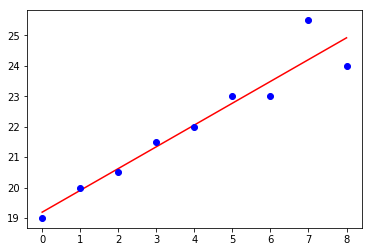

0.9138385502471169
0.8851180669961559
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           5.66e-05
Time:                        04:20:39   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

C:\Users\JSM\Anaconda2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [2]:
#Python
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

##미분(차분)으로 구하기
import sympy as sp
b0,b1=sp.symbols('b0 b1')

f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

##전치행렬, R^2
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

A=np.array([x,np.ones(9)])
print A

w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

yhat=w0*x+w1
print yhat

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print r_squared

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   #개선 R^2
print adjusted_r_squared 

import statsmodels.api as sm
result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj #스탯스모델, 주요 메소드와 스탯을 알 수 있다.

In [3]:
#Matrix Inverse Method

import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

np.set_printoptions(precision=2, suppress=True) #출력 자릿 수 2자리 제한

xI = np.linalg.inv(x) #역함수
print "x inv: \n", xI

print "identity matrix 'x * xI': \n", np.dot(x,xI) #x와 x1의 내적은 단위행렬

print "identity matrix 'x * xI': \n", np.dot(x,xI) #numpy 기능도 있다.

##베타 : x의 역행렬 X y

import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

w1,w2=np.dot(xI,y)
print(w1,w2) 

print 2*w1+(-4)*w2
print 3*w1+6*w2 #실제 값을 구할 수 있다.

print np.linalg.solve(x,y)

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]
identity matrix 'x * xI': 
[[1. 0.]
 [0. 1.]]
identity matrix 'x * xI': 
[[1. 0.]
 [0. 1.]]
(3.5, -0.25)
8.0
9.0
[ 3.5  -0.25]


[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
('weights=', array([1.4, 3.5]))


C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


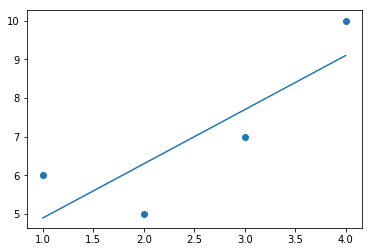

In [4]:
#Matrix Inverse Method 회귀모델

import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

np.dot(x,x.T) #이 다음에 역행렬로 구해야하지만 가역행렬이 아니라 오류가 생긴다. ->lstsq 사용

xTx=np.dot(x.T,x)

xTxI=np.linalg.inv(xTx)

xTyT=np.dot(x.T,y)

print("weights=",np.dot(xTxI,xTyT))

np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))


##최소자승법으로 구해보자

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

In [5]:
#Matrix Inverse Method 회귀모델 2

import numpy as np
x1=np.array([[1,2],[1,4],[1,6]]) #'1'열이 이번엔 앞에 있다.
y1=np.array([3,6,7])

xTx=np.dot(x1.T,x1) #위와 비교해 전치행렬이 앞에 있다.
xTxI=np.linalg.inv(xTx)
xTyT=np.dot(x1.T,y1)

np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

w0, w1 = np.linalg.lstsq(x1, y1)[0] #가중치(b0, b1) #위와 비교해 가중치의 순서가 바뀌어있다.
print(w0,w1)

(1.3333333333333308, 1.0000000000000004)


C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


In [6]:
#오류 계산
print "i\t오류\ty\t예측"
print "--\t-----\t-----\t-----"
for i in range(len(x1)):
    predicted=w0*x1[i][0] + w1*x1[i][1]
    error=y1[i]-predicted
    print("{0:2d}\t{1:.2f} =\t {2}  -\t{3:.2f}".format(i,error,y1[i],predicted))
    
w=np.array([w0,w1])
x1.shape,w.shape #x1과 w의 차원이 다르다
w=w[:,np.newaxis] #차원을 맞추어준다.
pred=np.dot(x1,w) #구한 가중치로 예측값을 구할 수 있다.
print pred

i	오류	y	예측
--	-----	-----	-----
 0	-0.33 =	 3  -	3.33
 1	0.67 =	 6  -	5.33
 2	-0.33 =	 7  -	7.33
[[3.33]
 [5.33]
 [7.33]]


In [7]:
#Matrix
import numpy as np
X=np.matrix([[1,2],[1,4],[1,6]])
Y=np.matrix([3,6,7])
xTx=X.T*X
xTxI=xTx.I
xTyT=X.T*Y.T
print("weights=",xTxI*xTyT)

('weights=', matrix([[1.33],
        [1.  ]]))
